In [17]:
# 1.1.4 Activities 2

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

1. Decidir si cada una de las siguientes afirmaciones es verdadera o falsa.

- La variable que se va a predecir en la regresión se denomina variable independiente. <br>
R./ Falso, La variable que se va a predecir en la regresión se denomina variable **dependiente**.

- Si en el análisis de regresión simple la pendiente de la recta es negativa, entonces hay correlación lineal negativa entre las variables. <br>
R./ Verdadero, si en el análisis de regresión simple la pendiente de la recta es negativa, entonces hay **correlación lineal negativa** entre las variables.

- La nube de puntos es una representación gráfica que nos permite visualizar la posible relación entre dos variables. <br>
R./ Verdadero, la nube de puntos es una representación gráfica que nos permite visualizar la posible relación entre dos variables, lo que facilita la identificación de patrones o tendencias en los datos.

- El coeficiente de correlación lineal siempre toma valores entre −2 y 2. <br>
R./ Falso, el coeficiente sde correlación lineal toma valores entre -1 y 1.

- El coeficiente de determinación puede tomar valores negativos. <br>
R./ Falso, el coeficiente de determinación, comúnmente conocido como R cuadrado, es una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente(s). Este coeficiente siempre toma valores entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos y 0 indica que el modelo no explica la variabilidad de la variable dependiente. Por lo tanto, el coeficiente de determinación no puede tomar valores negativos.

- Un coeficiente de correlación lineal casi cero indica que la relación lineal entre las variables dependiente e independiente es muy débil.<br>
R./ Verdadero, un coeficiente de correlación lineal cercano a cero indica que la relación lineal entre las variables dependiente e independiente es muy débil o casi inexistente. 

- Si el coeficiente de correlación lineal vale 1 se dice que hay correlación lineal perfecta positiva.<br>
R./ Verdadero, cuando el coeficiente de correlación lineal tiene un valor de 1, se dice que hay una correlación lineal perfecta positiva entre las variables. Esto significa que a medida que una variable aumenta, la otra variable también aumenta en una relación proporcional.

- La variable que se predice en el análisis de regresión es la variable dependiente.<br>
R./ Verdadero, En el análisis de regresión, la variable que se predice se denomina la variable dependiente. Esta variable es la que se intenta predecir o explicar en función de una o más variables independientes.

- Un coeficiente de correlación negativo entre la variable dependiente Y y la variable independiente X, indica que al aumentar X se esperan disminuciones en Y.<br>
R./ Verdadero, Un coeficiente de correlación negativo entre la variable dependiente Y y la variable independiente X indica que al aumentar X, se esperan disminuciones en Y. 

2. Observe el siguiente diagrama de dispersión con atención.

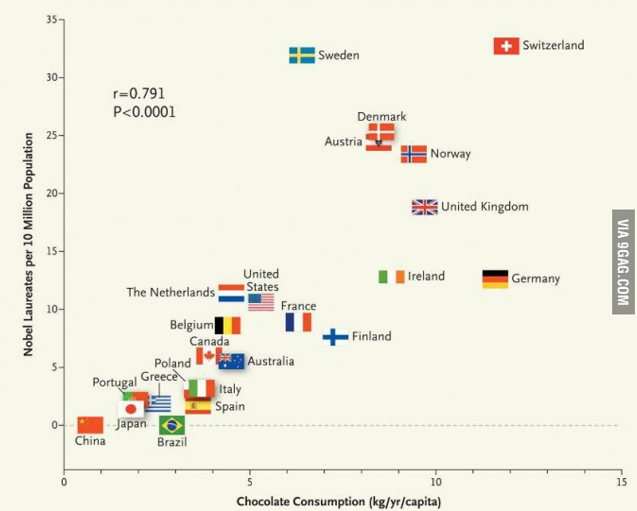

Interprete el coeficiente de correlación reportado en el diagrama. ¿Qué conclusión puede obtener usted? ¿Qué opina de esa conclusión?

R./ Existe correlacion, a medida que un país consume más chocolate el número de premios nobel aumenta, pero es una correlacion falsa ya que los dos fenomenos nobel y chocolate no tienen una relación real. 

La conclusión de que el consumo de chocolate causa que un país tenga más premios Nobel es poco probable. Es más probable que la correlación observada se deba a otras variables, como la riqueza del país, el nivel educativo o la cultura.

3. Se han realizado cinco observaciones sobre dos variables, X e Y, tabuladas de la siguiente forma

|X |5 |7 |10|13|15|
|--|--|--|--|--|--|
|Y |2 |3 |4 |5 |6 |

Complete la siguiente tabla de reporte haciendo cálculo manuales, luego ajuste el modelo en R y compare sus resultados con los de R.

R./ Usare Python

In [20]:
import numpy as np

# List to arrays NumPy

y = [2,3,4,5,6]
y = np.array(y)

x = [5,7,10,13,15]
x = np.array(x).reshape(-1, 1)

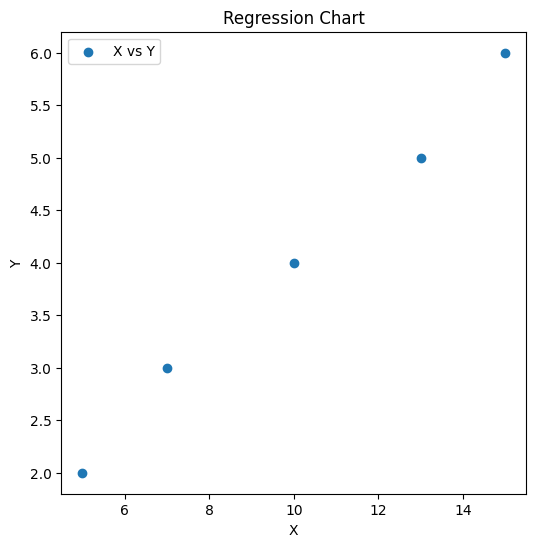

In [21]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='X vs Y')
plt.title('Regression Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

In [22]:
# Lineal regression
modelo = LinearRegression().fit(x, y)
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

linea_regresion = pendiente * x + intercepto

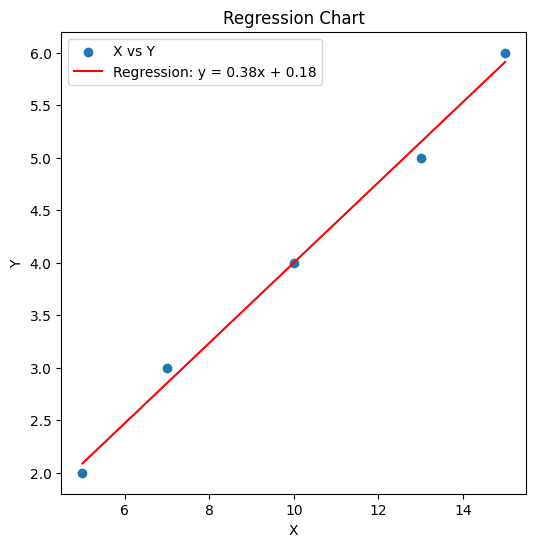

In [23]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='X vs Y')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [24]:
# Obtener los coeficientes beta
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

In [25]:
# Número de observaciones
n = len(x)

# Calcular el error estándar de la estimación
y_pred = modelo.predict(x)
error = y - y_pred
error_estandar = np.sqrt(np.sum(error**2) / (n - 2))

# Calcular la desviación estándar de los coeficientes
X_mean = np.mean(x)
desv_est_beta_1 = error_estandar / (np.sqrt(np.sum((x - X_mean)**2)))
desv_est_beta_0 = error_estandar * np.sqrt(np.sum(x**2) / (n * np.sum((x - X_mean)**2)))

In [26]:
error_estandar, desv_est_beta_0, desv_est_beta_1

(0.14002800840280064, 0.18098793347787134, 0.01698089027028307)

In [27]:
# Calcular los intervalos de confianza para los coeficientes beta
t_value = stats.t.ppf(0.975, df=n-2)  # Valor crítico de t para un intervalo de confianza del 95%
intervalo_beta_1 = t_value * desv_est_beta_1
intervalo_beta_0 = t_value * desv_est_beta_0

# Imprimir los intervalos de confianza
print("Intervalo de confianza para beta_1:", (beta_1 - intervalo_beta_1, beta_1 + intervalo_beta_1))
print("Intervalo de confianza para beta_0:", (beta_0 - intervalo_beta_0, beta_0 + intervalo_beta_0))


Intervalo de confianza para beta_1: (0.3283121696753708, 0.43639371267757043)
Intervalo de confianza para beta_0: (-0.3995137919623917, 0.7524549684329795)


In [28]:
y_pred = modelo.predict(x)

df_results = pd.DataFrame({'X': x.flatten(), 'y': y.flatten(), 'pred': y_pred.flatten()})
df_results['error'] = df_results['y'] - df_results['pred']

df_results

,X,y,pred,error
0,5,2,2.088235,-0.088235
1,7,3,2.852941,0.147059
2,10,4,4.000000,0.000000
3,13,5,5.147059,-0.147059
4,15,6,5.911765,0.088235


In [29]:
mse = mean_squared_error(y, y_pred)
rse = np.sqrt(mse)
mse, rse

(0.011764705882352884, 0.10846522890932782)

In [30]:
error_estandar

0.14002800840280064

In [31]:
r2_score(y, y_pred)

0.9941176470588236

Falta calcular la anova

4. Un investigador decidió estudiar la relación entre los gastos familiares y el ahorro familiar en grupo de familias de un barrio de la ciudad. El investigador recolectó la información (en miles de pesos) y ajustó el modelo que a él le interesa en R. Los resultados obtenidos se presentan a continuación.

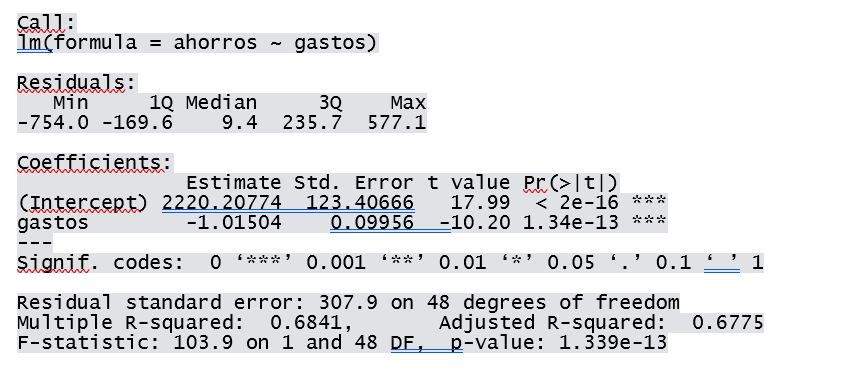

Basándose en los resultados de R responda las siguientes preguntas.

- ¿Cuál es la variable respuesta? ¿Cuál es la covariable?

R./ <br>
Variable respuesta: ahorros <br>
Covariable: gastos

- ¿Cuántas familias estudió el investigador? <br>

R./ n = 25

- Escriba el modelo ajustado al cual llegó el investigador.

R./ $\hat{Ahorro} = 2220.21 - 1.02 * Gastos $

- Interprete en el contexto del problema los coeficientes del modelo.

R./ β_1=1.2 versus H_a: β_1≠1.2, to=1.8577 y como valor-P ∈ (5%, 10%) entonces no se rechaza H_0. 

$\hat{\beta_{0}}$ Para una familia que sus gastos sean 0 (no tenga gastos) su ahorro promedio seria de $ 2220.21 

$\hat{\beta_{1}}$ Por cada unidad de gasto el ahorro dismunuye $1.015

- ¿Cuál es la varianza estimada de los errores?

R./ 307.9 ** 2 = 94802.41

- ¿Cuál es el error estándar del coeficiente asociado a la covariable?

R./ 0.09956 

- Una teoría económica reciente afirma que por cada peso adicional que una familia gasta, el ahorro familiar disminuye en promedio 1.2 pesos. El investigador al ver los resultados de su estudio piensa que la teoría está errada y considera que la disminución en el ahorro es diferente al de la teoría. Escriba las hipótesis del problema y pruebe esta afirmación a un nivel de significancia del 5%.

R./ 

- Construya un intervalo de confianza del 95% para el coeficiente de los gastos. ¿Incluye este intervalo el valor de referencia del literal anterior? ¿Qué conclusión se puede obtener en relación a la hipótesis del intervalo anterior?

R./ 

- Si una familia tiene un gasto mensual de millón y medio de pesos, ¿cuál es el ahorro medio esperado para esa familia en ese mes?

R./ 

- Haga una interpretación del R2.

R./ 

- Aplique la prueba de significancia de la regresión por medio del análisis de varianza (anova) con un nivel de significancia del 5%. ¿Cuál es su conclusión?

R./ 

- ¿Cuál es la conclusión al probar el siguiente conjunto de hipótesis H_0:β_0=0 versus H_1:β_0≠0 a un nivel de significancia del 5%?

R./ 

- ¿Qué signo debería tener el coeficiente de correlación lineal entre el gasto y el ahorro familiar mensual?

R./ 

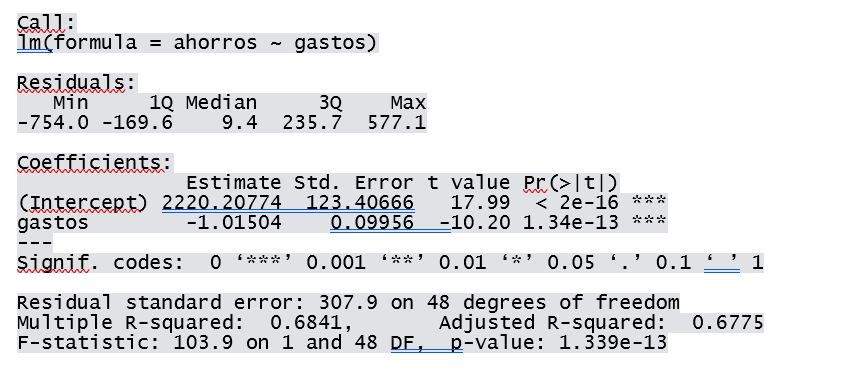

In [32]:
print('ok_')

ok_
